In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score


In [11]:
# Carregar o conjunto de dados do arquivo Excel
data = pd.read_excel('BaseFadiga - corrigida.xlsx')
data = pd.DataFrame(data)
data.drop(columns=['ID mistura'], inplace=True)

# Verificar o tamanho do conjunto de dados
n_linhas, n_colunas = data.shape
print(f"Número de linhas: {n_linhas}")
print(f"Número de colunas: {n_colunas}")

# Identificar o tipo de cada variável
display(data.info())

# Analisar estatísticas descritivas básicas para variáveis numéricas
print("Estatísticas descritivas básicas para variáveis numéricas:")
display(data.describe())

# Verificar a presença de valores ausentes ou dados inconsistentes
valores_ausentes = data.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)


Número de linhas: 89
Número de colunas: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VB135   86 non-null     float64
 1   p200    89 non-null     float64
 2   p4      89 non-null     float64
 3   p38     89 non-null     float64
 4   p34     89 non-null     float64
 5   Teor    89 non-null     float64
 6   VMA     88 non-null     float64
 7   VFA     89 non-null     float64
 8   C11     89 non-null     float64
 9   C12     89 non-null     float64
 10  Gamma   89 non-null     int64  
 11  Delta   89 non-null     float64
 12  Alpha   89 non-null     float64
 13  Classe  89 non-null     int64  
dtypes: float64(12), int64(2)
memory usage: 9.9 KB


None

Estatísticas descritivas básicas para variáveis numéricas:


,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,86.000000,89.000000,89.000000,89.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000
mean,882.168023,0.051554,0.487591,0.218623,0.015844,0.049891,0.153731,0.735174,0.000616,0.681640,1.527627e+09,-1.367416,3.262225,1.977528
std,662.393042,0.011766,0.071263,0.097850,0.026569,0.007027,0.012171,0.030344,0.001068,0.124059,1.303462e+10,0.224156,0.333053,0.768374
min,304.700000,0.032000,0.253520,0.017455,0.000000,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,389.600000,0.042000,0.456300,0.145600,0.000000,0.045000,0.146600,0.725000,0.000139,0.602000,3.000000e+06,-1.436000,3.030000,1.000000
50%,586.250000,0.054000,0.500000,0.208000,0.006000,0.050000,0.152000,0.740000,0.000246,0.685000,7.570000e+06,-1.340000,3.194000,2.000000
75%,1040.000000,0.058700,0.540000,0.295000,0.015600,0.055000,0.162000,0.749800,0.000627,0.752000,2.020000e+07,-1.234000,3.560000,3.000000
max,4380.000000,0.085231,0.617262,0.464000,0.167271,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


Valores ausentes por coluna:
VB135     3
p200      0
p4        0
p38       0
p34       0
Teor      0
VMA       1
VFA       0
C11       0
C12       0
Gamma     0
Delta     0
Alpha     0
Classe    0
dtype: int64


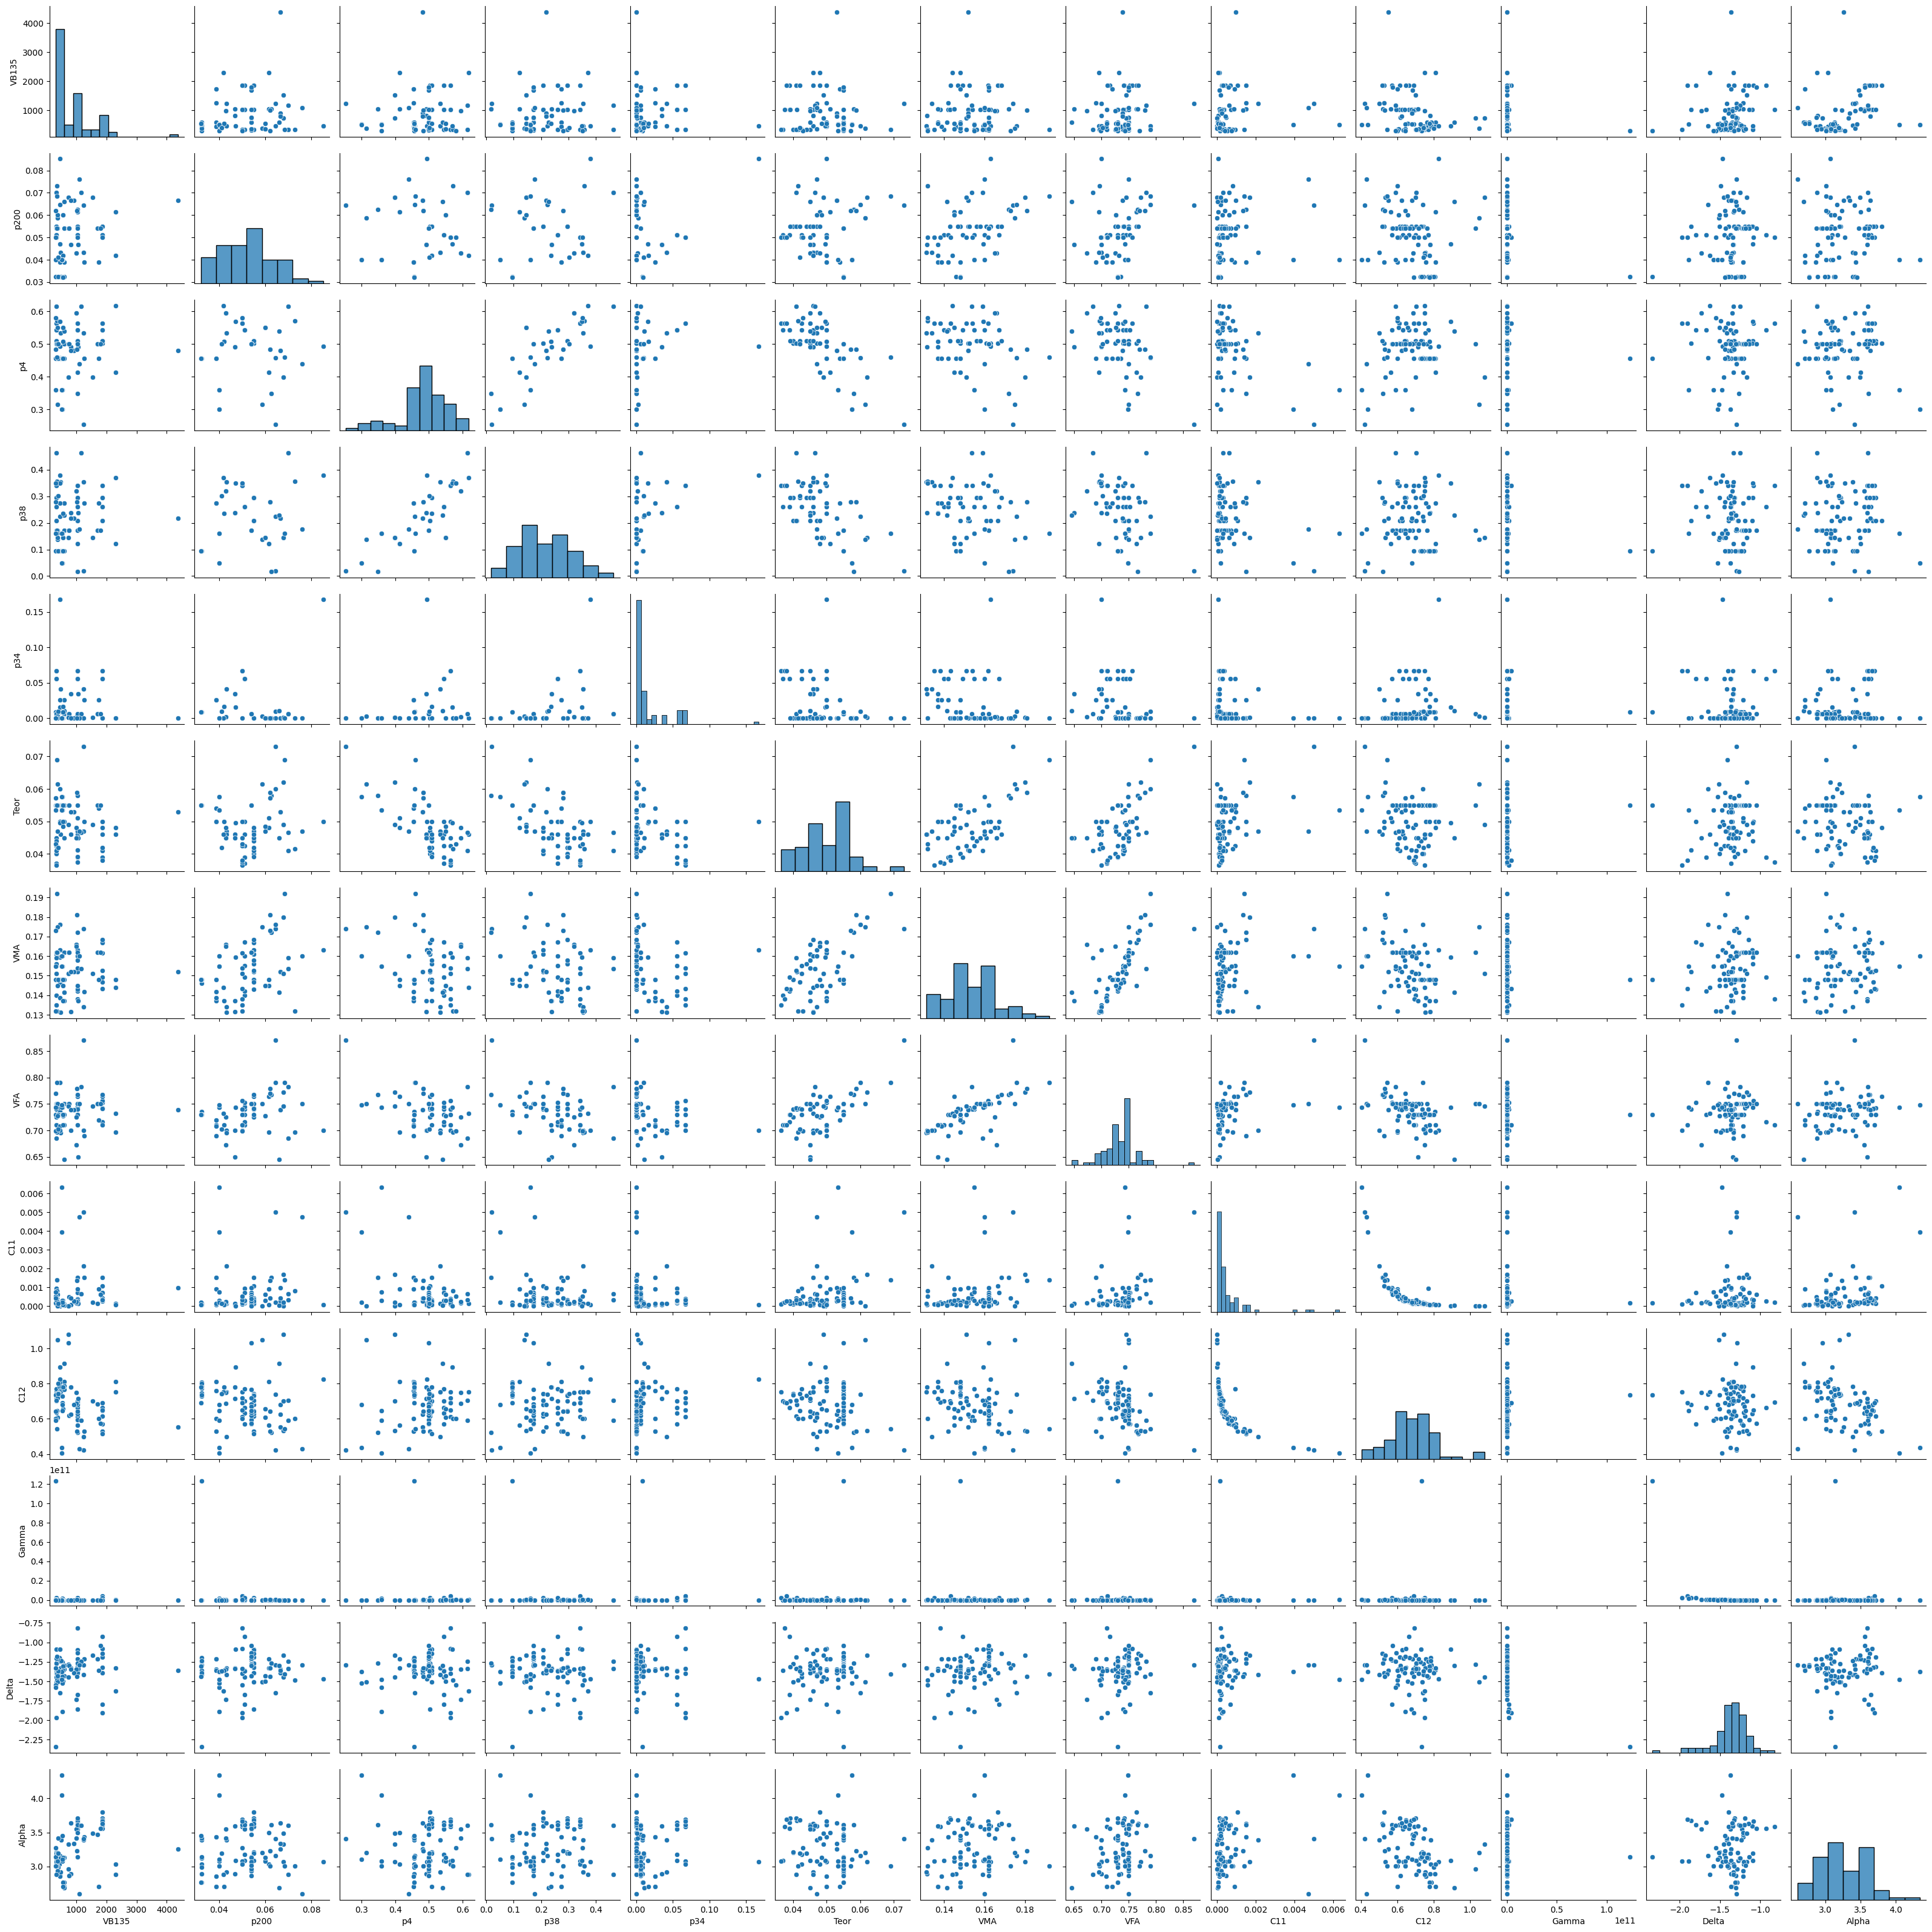

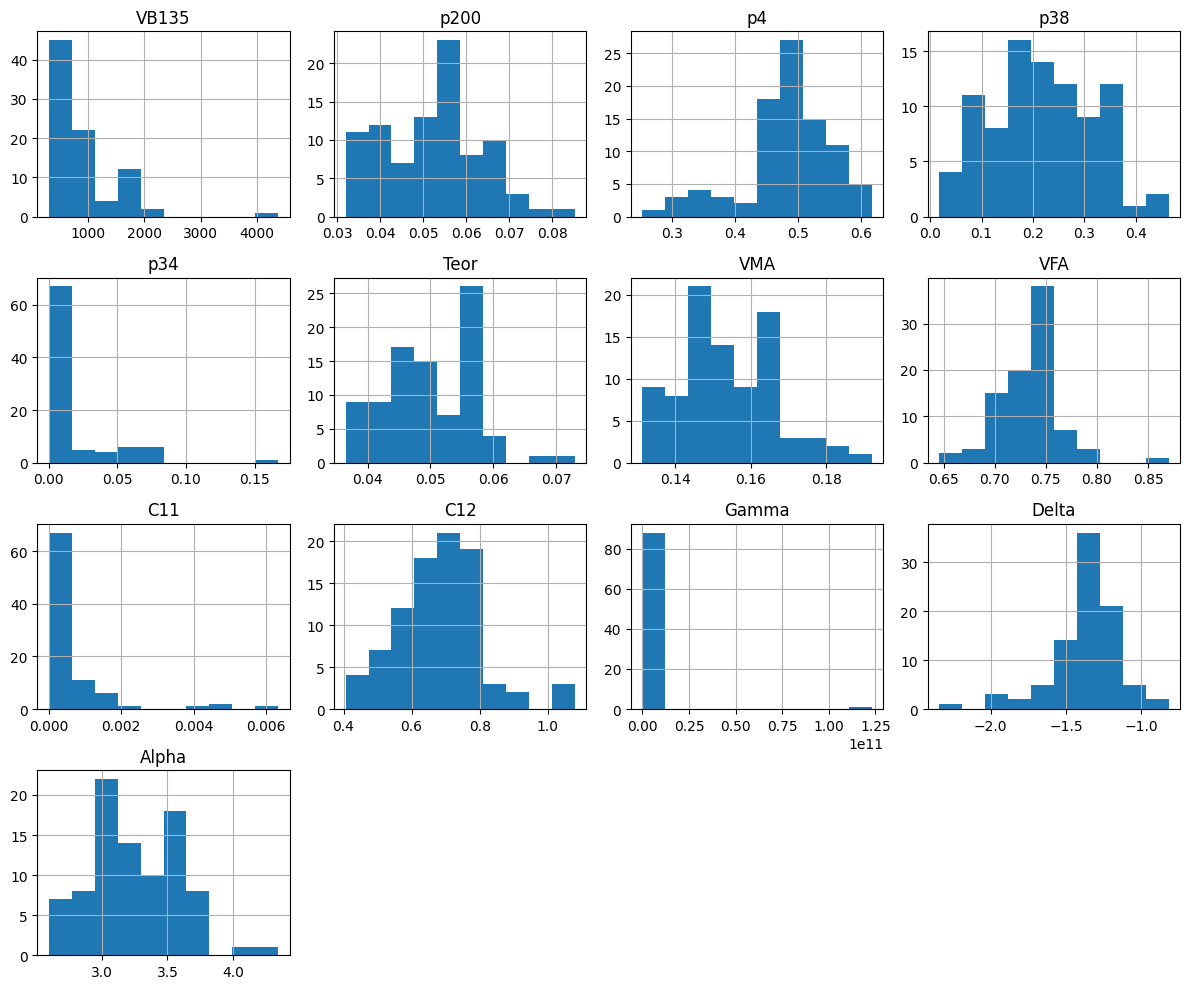

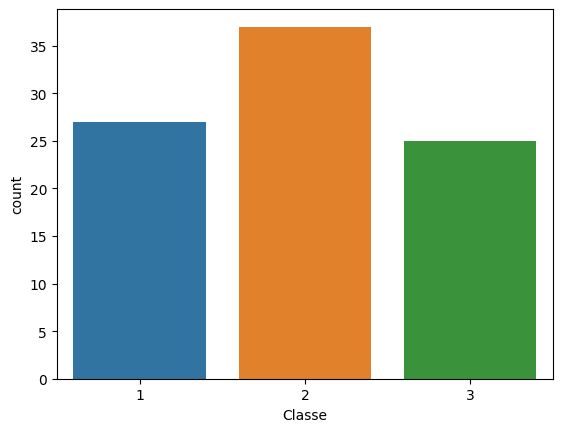

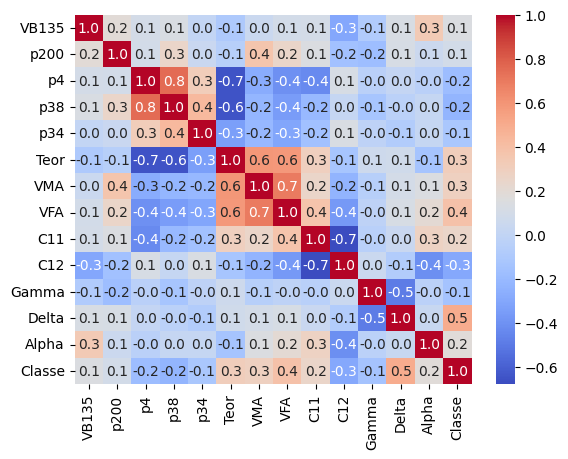

In [12]:
# Plotar gráficos de dispersão para as variáveis numéricas
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA', 'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha']
sns.pairplot(data[variaveis_numericas])
plt.show()

# Visualizar a distribuição das variáveis numéricas usando histogramas
data[variaveis_numericas].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Explorar a distribuição das classes da variável de saída
sns.countplot(x='Classe', data=data)
plt.show()

# Identificar correlações entre as variáveis
correlacoes = data.corr()
sns.heatmap(correlacoes, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()


In [13]:
# Lidar com valores ausentes
data = data.dropna()  # Excluir amostras com valores ausentes
# Ou utilizar imputação de valores, por exemplo:
# data = data.fillna(data.mean())  # Preencher valores ausentes com a média

# Codificar variáveis categóricas, se existirem
categoricas = ['Classe']  # Lista das variáveis categóricas
encoder = LabelEncoder()
for coluna in categoricas:
    data[coluna] = encoder.fit_transform(data[coluna])

# Normalizar as variáveis numéricas
numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA', 'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha']
scaler = StandardScaler()
data[numericas] = scaler.fit_transform(data[numericas])

# Visualizar o conjunto de dados após o pré-processamento
print(data.head())


      VB135      p200        p4       p38       p34      Teor       VMA  \
0 -0.840429 -0.036229  0.777087  0.419623  1.473377 -1.835873 -1.111508   
1 -0.840429 -0.121149  1.055528  1.231288  1.881818 -1.908031 -1.531649   
2 -0.840429  0.303450  0.206281 -0.118106 -0.605961 -1.402924 -0.439281   
3 -0.840429  0.303450  0.289813  0.764580 -0.605961 -1.402924 -0.439281   
4  0.207647 -0.036229  0.777087  0.419623  1.473377 -1.547241 -0.943451   

        VFA       C11       C12     Gamma     Delta     Alpha  Classe  
0 -0.817708 -0.394188  0.135719 -0.119124  0.041970 -0.501660       0  
1 -1.147572 -0.464705  0.545713  0.030217 -2.634709 -0.546495       0  
2 -0.322911 -0.454499  0.481400 -0.120255  0.431949 -0.166892       0  
3  0.171886 -0.409961  0.425126 -0.117615 -0.596179 -0.137002       0  
4 -0.157978 -0.342227 -0.161728 -0.105547 -1.331822  1.157236       0  


In [14]:
# Dividir o conjunto de dados em recursos (X) e alvo (y)
X = data.drop(['C11', 'C12', 'Alpha', 'Delta', 'Gamma', 'Classe'], axis=1)
y = data[['C11', 'C12', 'Alpha', 'Delta', 'Gamma', 'Classe']]
# Realizar a seleção de recursos, se necessário
# selector = SelectKBest(k=5)  # Selecionar os 5 melhores recursos
# X_selected = selector.fit_transform(X, y)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar modelos de aprendizado de máquina
regression_model = MultiOutputRegressor(LinearRegression())
classification_model = RandomForestClassifier()

# Treinar os modelos
regression_model.fit(X_train, y_train[['C11', 'C12', 'Alpha', 'Delta', 'Gamma']])
classification_model.fit(X_train, y_train['Classe'])

# Realizar previsões
regression_predictions = regression_model.predict(X_test)
classification_predictions = classification_model.predict(X_test)

# Avaliar o desempenho dos modelos
regression_score = mean_squared_error(y_test[['C11', 'C12', 'Alpha', 'Delta', 'Gamma']], regression_predictions)
classification_score = accuracy_score(y_test['Classe'], classification_predictions)

# Avaliar o desempenho com validação cruzada
cv_scores_regression = cross_val_score(regression_model, X, y[['C11', 'C12', 'Alpha', 'Delta', 'Gamma']], cv=5, scoring='neg_mean_squared_error')
cv_scores_classification = cross_val_score(classification_model, X, y['Classe'], cv=5, scoring='accuracy')

# Score do ajuste linear R^2
linear_r2_score = r2_score(y_test[['C11', 'C12', 'Alpha', 'Delta', 'Gamma']], regression_predictions, multioutput='variance_weighted')

# Imprimir resultados
print('Regression Model Score:', regression_score)
print('Linear R^2 Score:', linear_r2_score)
print('Classification Model Score:', classification_score)
print('Cross-Validation Regression Scores:', cv_scores_regression)
print('Cross-Validation Classification Scores:', cv_scores_classification)


Regression Model Score: 0.7131540799418464
Linear R^2 Score: 0.16150373572998414
Classification Model Score: 0.5882352941176471
Cross-Validation Regression Scores: [-0.62977521 -0.68119943 -1.58463772 -1.16741975 -1.45033301]
Cross-Validation Classification Scores: [0.58823529 0.41176471 0.52941176 0.41176471 0.76470588]
